In [1]:
from speech_pause_indicator import speech, pause ; import setup; import matplotlib.pyplot as plt; import numpy as np

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
##https://pyts.readthedocs.io/en/stable/auto_examples/metrics/plot_dtw.html
from pyts.datasets import load_gunpoint; import math
from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix, _return_path, _blurred_path_region)
import itertools; import statistics

In [3]:
# pyts - classic
def classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y):
    method = 'classic'
    dtw_classic, path_classic = dtw(x, y, dist='square', method=method, return_path=True)
    path = path_classic
    dist = dtw_classic
    plt.figure(figsize=(8, 4.5))                                
    plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
    plt.plot(path[0], path[1]);
    alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel, sr, speech_x, speech_y)

    # return path, dist

In [4]:
# pyts itakura

def itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech1, speech2):

    method = 'itakura'
    slope = 1.2
    dtw_itakura, path_itakura = dtw(
        x, y, dist='square', method='itakura',
        options={'max_slope': slope}, return_path=True
    )
    parallelogram = itakura_parallelogram(n_timestamps_1, n_timestamps_2,
                                          max_slope=slope)
    matrix_itakura = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
    for i in range(n_timestamps_1):
        matrix_itakura[i, np.arange(*parallelogram[:, i])] = 0.5
    matrix_itakura[tuple(path_itakura)] = 1.
    plt.figure(figsize=(8, 4.5))          
    path = path_itakura
    dist = dtw_itakura
    
    plt.plot(path[0], path[1]);

    plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
    alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel, sr, speech1, speech2);
    
    #return path, dist

In [5]:
# pyts sakoechiba

def sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y):
    method = "sakoechiba"
    window_size = 0.1
    dtw_sakoechiba, path_sakoechiba = dtw(
        x, y, dist='square', method='sakoechiba',
        options={'window_size': window_size}, return_path=True
    )
    band = sakoe_chiba_band(n_timestamps_1, n_timestamps_2,
                            window_size=window_size)
    matrix_sakoechiba = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
    for i in range(n_timestamps_1):
        matrix_sakoechiba[i, np.arange(*band[:, i])] = 0.5
    matrix_sakoechiba[tuple(path_sakoechiba)] = 1.

    path = path_sakoechiba
    dist = dtw_sakoechiba
    
    plt.figure(figsize=(8, 4.5)); plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
    plt.plot(path[0], path[1]);
    alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel, sr, speech_x, speech_y)
    
    # return path, dist

In [6]:
def multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y):
    method = "multiscale"
    x = np.array(x)
    y = np.array(y)
    
    resolution, radius = 5, 2
    dtw_multiscale, path_multiscale = dtw(
        x, y, dist='square', method='multiscale',
        options={'resolution': resolution, 'radius': radius}, return_path=True
    )

    x_padded = x.reshape(-1, resolution).mean(axis=1)
    y_padded = y.reshape(-1, resolution).mean(axis=1)

    cost_mat_res = cost_matrix(x_padded, y_padded, dist='square', region=None)
    acc_cost_mat_res = accumulated_cost_matrix(cost_mat_res)
    path_res = _return_path(acc_cost_mat_res)

    multiscale_region = _blurred_path_region(
        n_timestamps_1, n_timestamps_2, resolution, x_padded.size, y_padded.size,
        path_res,
        radius=radius
    )
    matrix_multiscale = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
    for i in range(n_timestamps_1):
        matrix_multiscale[i, np.arange(*multiscale_region[:, i])] = 0.5
    matrix_multiscale[tuple(path_multiscale)] = 1.

    path = path_multiscale
    dist = dtw_multiscale
    
    plt.figure(figsize=(8, 4.5)); plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
    plt.plot(path[0], path[1]);
    alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel, sr, speech_x, speech_y)
    
    # return path, dist

In [38]:
def make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr):
    from scipy.io import wavfile 
    capstone_dir = "/Users/ninismacbook/other_docs/Y4S1/capstone" 
    
    file1_path = capstone_dir + "/py_converted/" + file1 ; file2_path = capstone_dir + "/py_converted/" + file2
    
    samplerate, query = wavfile.read(file1_path) ; samplerate, ref = wavfile.read(file2_path)
    new_sr = samplerate/sr
    # If input sr = 4410, then new_sr = 44100/4410 = 10 (samplerate from py_converted is always 44100)
    
    query_sample = query[int(samplerate*seg1_1): int(samplerate*seg1_2)]
    ref_sample = ref[int(samplerate*seg2_1): int(samplerate*seg2_2)]
    
    longer_query_len = len(query_sample)
    a = len(ref_sample) 
    if a > longer_query_len:
        longer_query_len = a
    
    new_query_sample = []
    new_ref_sample = []
    
    query_s = []
    ref_s = []
    
    # speech pause indicator uses 8k voice samples. Using the segment timestamps to store speech pause array
    sr_speech = 8000
    s1 = speech(file1)[1][int(sr_speech*seg1_1):int(sr_speech*seg1_2)]
    s2 = speech(file2)[1][int(sr_speech*seg2_1):int(sr_speech*seg2_2)]
    
    
    for i in range(int(longer_query_len // new_sr)):
        
        # Only append when the index is within the length of new_query_sample and new_ref_sample
        if int(i*new_sr) < len(query_sample):
            new_query_sample.append(query_sample[int(i*new_sr)])
        if int(i*new_sr) < len(ref_sample):
            new_ref_sample.append(ref_sample[int(i*new_sr)])            
            
        if int(i* sr_speech / sr) < len(s1):
            query_s.append(s1[int(i* sr_speech / sr)])
            
        if int(i* sr_speech / sr) < len(s2):            
            ref_s.append(s2[int(i* sr_speech /sr)])


    return new_query_sample, new_ref_sample, sr, query_s, ref_s

def get_word_xy(file1, time1, seg1_1, seg1_2, file2, time2, seg2_1, seg2_2, sr):
    
    queries = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
    query = queries[0]
    ref = queries[1]
    x = (time1 - seg1_1)/(seg1_2 - seg1_1) * len(query)
    y = (time2 - seg2_1)/(seg2_2 - seg2_1) * len(ref)
    return x, y

def alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel, sr, speech1, speech2):
    colors = ['red', 'g', 'b', 'm', 'brown', '#d89743', 'grey', 'c', 'orange', 'g', 'b', 'm', 'red']
    err = []
    for i in range(len(time1_lst)):
        x_axis, y_axis = get_word_xy(file1, time1_lst[i], seg1_1, seg1_2, file2, time2_lst[i], seg2_1, seg2_2, sr)

        plt.axvline(x_axis, color = colors[i])
        plt.hlines(y_axis, 0, x_axis+3000, color = colors[i])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        x_val = list(itertools.chain(*np.where(np.abs(path[0] - x_axis) < 1)))[0]
        y_val = list(itertools.chain(*np.where(np.abs(path[1] - y_axis) < 1)))[0]

        warp_y = path[1][x_val]
        warp_x = path[0][y_val]
        
        e = (np.abs(warp_x - x_axis) + np.abs(warp_y - y_axis))/sr
        err.append(e)    # unit = second
        
    median = statistics.median(err)
    err_sum = sum(err)
    
    print('Avg err (s): %.3f. Median err (s): %.3f' %(err_sum/len(time1_lst), median))
    print('Stretch speech: %.3f \nStretch pause: %.3f. \nStretch unaligned: %.3f. \nStretch overall: %.3f.' %stretch(path, speech1, speech2))
    
# deviation function

def deviation(rho, theta):
    dev = 0
    if rho >= theta and rho <= math.pi/2:
        dev = (rho-theta)/(math.pi/2-theta)
    else:
        dev = (theta - rho)/theta
    return dev

def stretch(path, speech_1, speech_2):
    len_x = max(path[0])
    len_y = max(path[1])
    xs = path[0]
    ys = path[1]
    theta = math.atan(len_y/len_x)    
    numerator = 0
    denominator = 0
    
    stretch_speech = 0
    stretch_pause = 0
    stretch_others = 0
    overall_stretch = 0

    # For 1 point in the warping path x, y
    # xs[i] = index of the point in the original query that dtw uses to align x
    # ys[i] = index of the point in the original reference query that dtw uses to align y                  
    
    # length of path = len(path[0]) = len(path[1])
    for i in range(len(path[0])-1):
        if xs[i+1]-xs[i] == 0:
            rho_i = math.pi/2
        else:
            rho_i = math.atan((ys[i+1]-ys[i]) / (xs[i+1]-xs[i]))

        dev_rho_i = deviation(rho_i, theta)
        numerator = dev_rho_i*math.sqrt((xs[i+1]-xs[i])**2 + (ys[i+1]-ys[i])**2)
        denominator = denominator + math.sqrt((xs[i+1]-xs[i])**2 + (ys[i+1]-ys[i])**2)

        sp1 = speech_1[xs[i]]
        sp2 = speech_2[ys[i]]
        
        if sp1 == sp2 == 1: # Add the deviation to either speech, pause, or not aligned
            stretch_speech = stretch_speech + numerator
        elif sp1 == sp2 == 0:
            stretch_pause = stretch_pause + numerator
        else:
            stretch_others = stretch_others+ numerator
            
    overall_stretch = (stretch_speech + stretch_pause + stretch_others)/denominator
    
    return stretch_speech/denominator, stretch_pause/denominator, stretch_others/denominator, overall_stretch

In [17]:
sr = 8000

# TORGO: Except in the winter

In [9]:
file1, seg1_1, seg1_2 = "torgo-healthy.wav", 2, 3.7
file2, seg2_1, seg2_2 = "torgo-patient.wav", 2.5, 4.7

x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)

xlabel = "Except in the winter - healthy" ;  ylabel = "Except in the winter - patient"
time1_lst = [2.34, 2.86, 3.03, 3.17] ; time2_lst = [2.8, 3.85, 4.03, 4.20]

Avg err (s): 0.467. Median err (s): 0.523
Stretch speech: 0.000 
Stretch pause: 0.534. 
Stretch unaligned: 0.129. 
Stretch overall: 0.663.


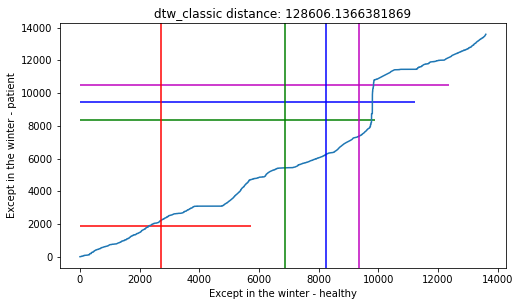

In [10]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.331. Median err (s): 0.328
Stretch speech: 0.000 
Stretch pause: 0.484. 
Stretch unaligned: 0.246. 
Stretch overall: 0.730.


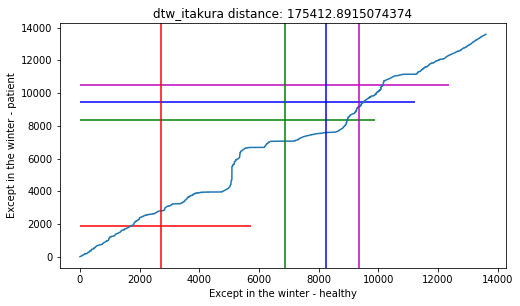

In [11]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.325. Median err (s): 0.355
Stretch speech: 0.000 
Stretch pause: 0.515. 
Stretch unaligned: 0.229. 
Stretch overall: 0.745.


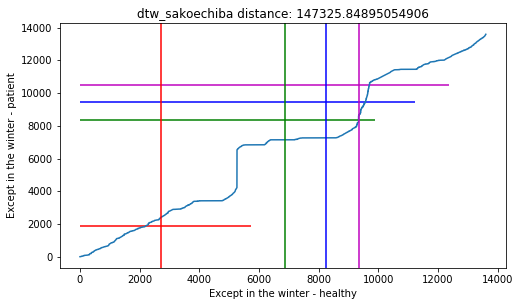

In [12]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.585. Median err (s): 0.607
Stretch speech: 0.000 
Stretch pause: 0.609. 
Stretch unaligned: 0.117. 
Stretch overall: 0.726.


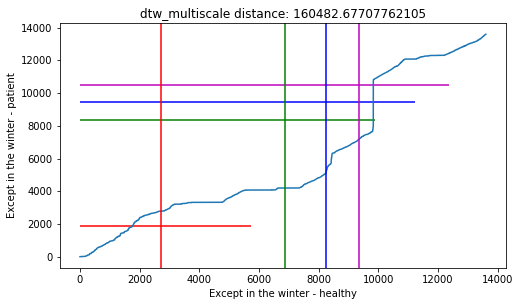

In [13]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

# Torgo: when the ooze or snow or ice presents

In [16]:
file1, seg1_1, seg1_2 = "torgo-healthy.wav", 3.7, 6.50
file2, seg2_1, seg2_2 = "torgo-patient.wav", 4.75, 11.38
x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)
time1_lst = [3.94, 4.03, 4.38, 4.8, 5.1, 5.54, 5.73, 6.18] ;
time2_lst = [7.07, 7.26, 7.78, 8.21, 8.53, 9.57, 9.9, 10.76]
xlabel = "Healthy: when the ooze or snow or ice presents" ;  ylabel = "patient"

Avg err (s): 1.028. Median err (s): 1.220
Stretch speech: 0.000 
Stretch pause: 0.542. 
Stretch unaligned: 0.233. 
Stretch overall: 0.775.


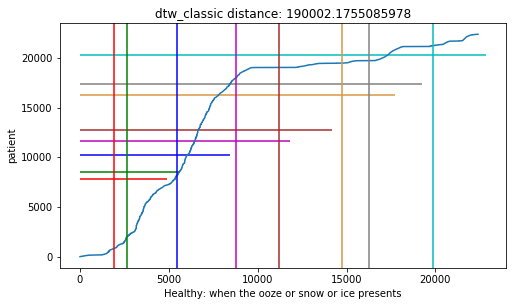

In [17]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.805. Median err (s): 0.710
Stretch speech: 0.000 
Stretch pause: 0.444. 
Stretch unaligned: 0.263. 
Stretch overall: 0.707.


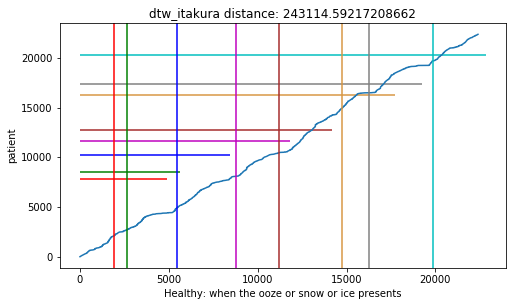

In [18]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.846. Median err (s): 0.644
Stretch speech: 0.000 
Stretch pause: 0.449. 
Stretch unaligned: 0.263. 
Stretch overall: 0.712.


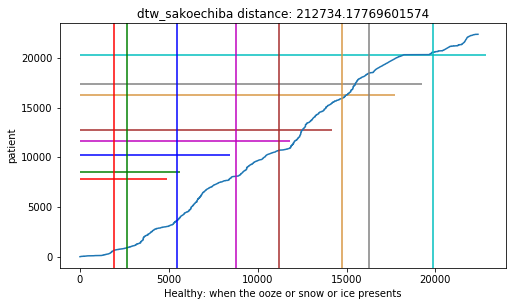

In [19]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 1.882. Median err (s): 1.890
Stretch speech: 0.000 
Stretch pause: 0.749. 
Stretch unaligned: 0.139. 
Stretch overall: 0.887.


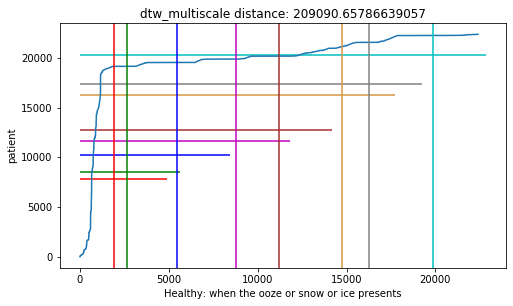

In [20]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

# Bamboo - perfect alignment - Normal v.s. Normal 01 vs. 01_1

In [21]:
file1, seg1_1, seg1_2 = "01.wav", 3.4, 5.8
file2, seg2_1, seg2_2 = "01_1.wav", 2, 4.1
x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)
xlabel = "Bamboo walls are getting to be very popular - Normal 1" ;  ylabel = "Normal 01_1"
time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.91, 5.21, 5.47] ;
time2_lst = [2.33, 2.63, 2.87, 3.12, 3.4, 3.57, 3.74, 4.06]

Avg err (s): 0.269. Median err (s): 0.241
Stretch speech: 0.187 
Stretch pause: 0.167. 
Stretch unaligned: 0.284. 
Stretch overall: 0.639.


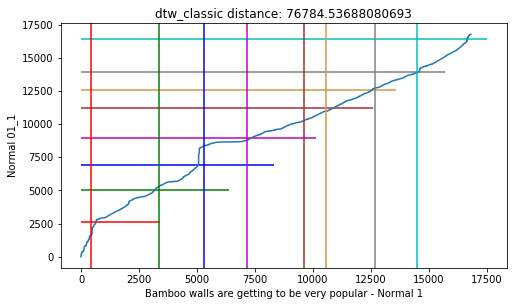

In [22]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.349. Median err (s): 0.369
Stretch speech: 0.162 
Stretch pause: 0.155. 
Stretch unaligned: 0.284. 
Stretch overall: 0.601.


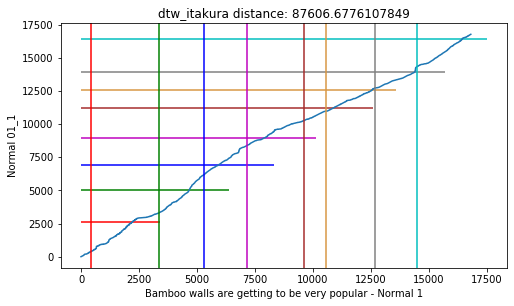

In [23]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.296. Median err (s): 0.288
Stretch speech: 0.158 
Stretch pause: 0.172. 
Stretch unaligned: 0.269. 
Stretch overall: 0.599.


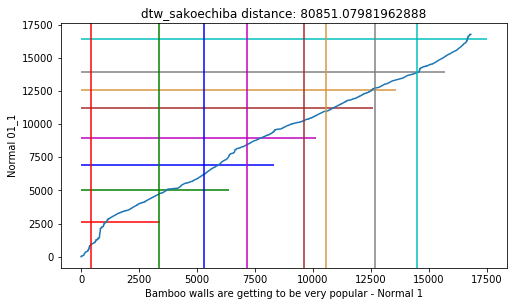

In [24]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.289. Median err (s): 0.247
Stretch speech: 0.160 
Stretch pause: 0.177. 
Stretch unaligned: 0.274. 
Stretch overall: 0.611.


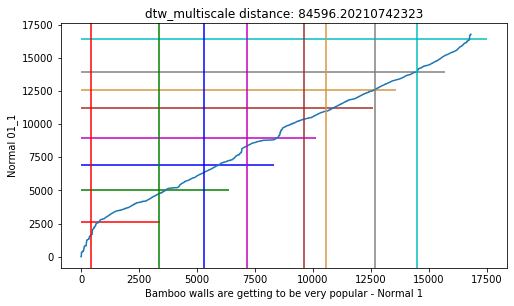

In [25]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

# Bamboo - perfect alignment - Normal v.s. Normal 01 vs. 01_2

In [26]:
file1, seg1_1, seg1_2 = "01.wav", 3.4, 5.8
file2, seg2_1, seg2_2 = "01_2.wav", 2, 4.15
x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)

xlabel = "Bamboo walls are getting to be very popular - Normal 01" ;  ylabel = "Normal 01_2"
time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.91, 5.21, 5.47] ;
time2_lst = [2.28, 2.72, 2.93, 3.18, 3.51, 3.66, 3.84, 4.11]

Avg err (s): 0.408. Median err (s): 0.447
Stretch speech: 0.140 
Stretch pause: 0.393. 
Stretch unaligned: 0.152. 
Stretch overall: 0.684.


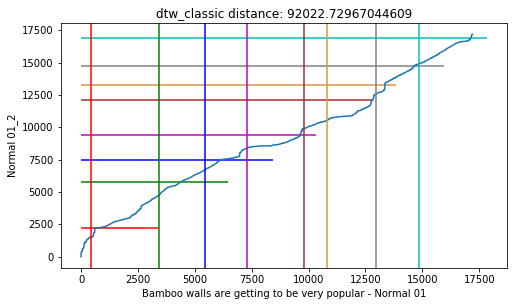

In [27]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.549. Median err (s): 0.529
Stretch speech: 0.136 
Stretch pause: 0.357. 
Stretch unaligned: 0.200. 
Stretch overall: 0.693.


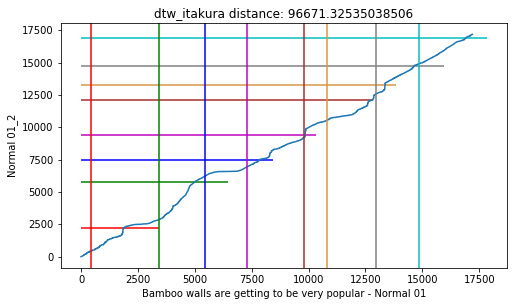

In [28]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.408. Median err (s): 0.447
Stretch speech: 0.140 
Stretch pause: 0.393. 
Stretch unaligned: 0.152. 
Stretch overall: 0.684.


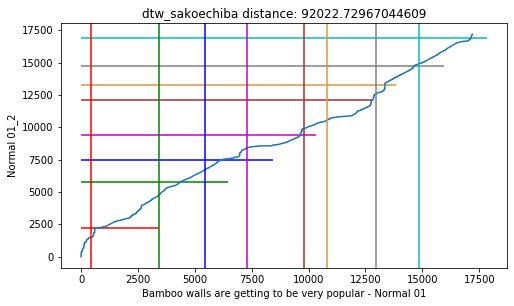

In [29]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.481. Median err (s): 0.501
Stretch speech: 0.140 
Stretch pause: 0.404. 
Stretch unaligned: 0.140. 
Stretch overall: 0.684.


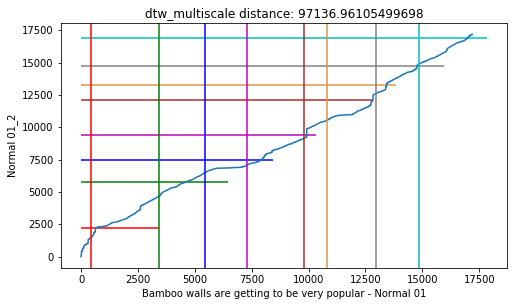

In [30]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

# Bamboo - perfect alignment - Normal v.s. Normal 01 vs. 01_3

In [31]:
file1, seg1_1, seg1_2 = "01.wav", 3.4, 5.8
file2, seg2_1, seg2_2 = "01_3.wav", 2, 4
x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)

xlabel = "Bamboo walls are getting to be very popular - Normal 1" ;  ylabel = "Normal 01_3"
time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.91, 5.21, 5.47] ;
time2_lst = [2.06, 2.45, 2.7, 2.94, 3.23, 3.41, 3.62, 3.98];

Avg err (s): 0.337. Median err (s): 0.251
Stretch speech: 0.166 
Stretch pause: 0.316. 
Stretch unaligned: 0.116. 
Stretch overall: 0.598.


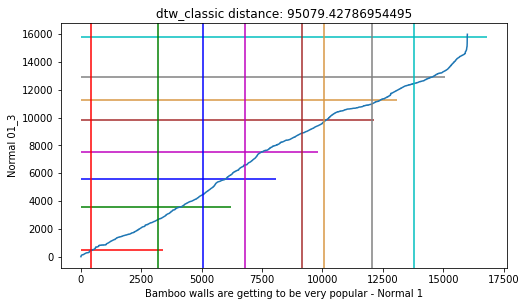

In [32]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.229. Median err (s): 0.224
Stretch speech: 0.137 
Stretch pause: 0.246. 
Stretch unaligned: 0.234. 
Stretch overall: 0.616.


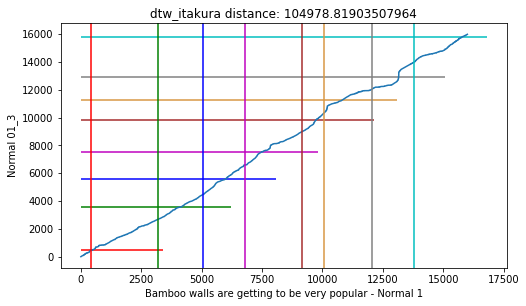

In [33]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.335. Median err (s): 0.251
Stretch speech: 0.165 
Stretch pause: 0.310. 
Stretch unaligned: 0.123. 
Stretch overall: 0.598.


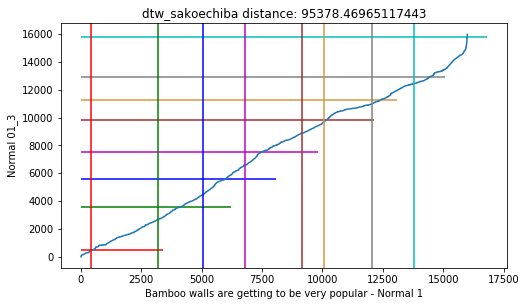

In [34]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.323. Median err (s): 0.234
Stretch speech: 0.165 
Stretch pause: 0.313. 
Stretch unaligned: 0.116. 
Stretch overall: 0.593.


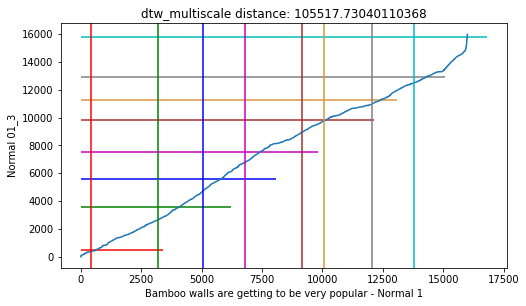

In [35]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

# Bamboo - perfect alignment - Normal v.s. Normal 01_2 vs. 01_3

In [36]:
file1, seg1_1, seg1_2 = "01_2.wav", 2, 4.15
file2, seg2_1, seg2_2 = "01_3.wav", 2, 4
x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)

xlabel = "Bamboo walls are getting to be very popular - Normal 01_2" ;  ylabel = "Normal 01_3"

time1_lst = [2.28, 2.72, 2.93, 3.18, 3.51, 3.66, 3.84, 4.11]
time2_lst = [2.06, 2.45, 2.7, 2.94, 3.23, 3.41, 3.62, 3.98];

Avg err (s): 0.584. Median err (s): 0.628
Stretch speech: 0.204 
Stretch pause: 0.247. 
Stretch unaligned: 0.306. 
Stretch overall: 0.757.


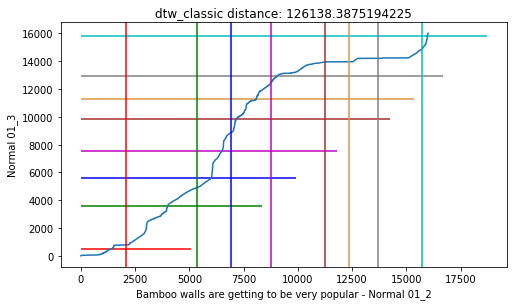

In [37]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.302. Median err (s): 0.341
Stretch speech: 0.143 
Stretch pause: 0.230. 
Stretch unaligned: 0.334. 
Stretch overall: 0.707.


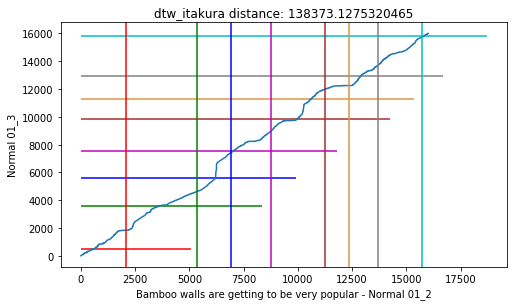

In [38]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.290. Median err (s): 0.243
Stretch speech: 0.184 
Stretch pause: 0.264. 
Stretch unaligned: 0.284. 
Stretch overall: 0.732.


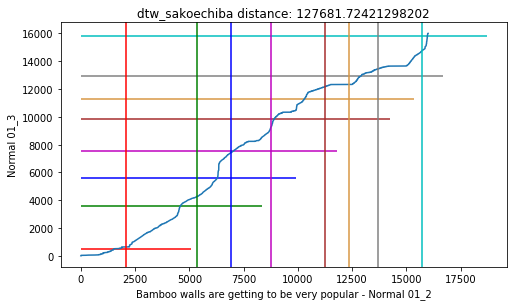

In [39]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.201. Median err (s): 0.201
Stretch speech: 0.188 
Stretch pause: 0.297. 
Stretch unaligned: 0.238. 
Stretch overall: 0.723.


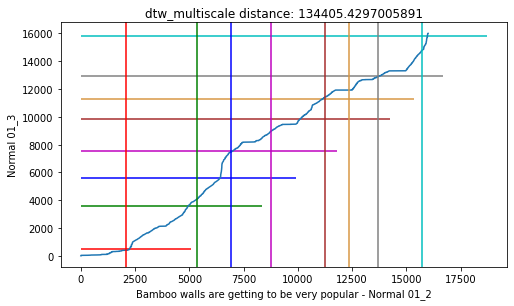

In [40]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

# Bamboo - perfect alignment - Normal v.s. Normal 01_1 vs. 01_2

In [41]:
file1, seg1_1, seg1_2 = "01_1.wav", 2, 4.1
file2, seg2_1, seg2_2 = "01_2.wav", 2, 4.15
x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)
time1_lst = [2.33, 2.63, 2.87, 3.12, 3.4, 3.57, 3.74, 4.06]
time2_lst = [2.28, 2.72, 2.93, 3.18, 3.51, 3.66, 3.84, 4.11]

xlabel = "Bamboo walls are getting to be very popular - Normal 01_1" ;  ylabel = "Normal 01_2"

Avg err (s): 0.653. Median err (s): 0.787
Stretch speech: 0.265 
Stretch pause: 0.184. 
Stretch unaligned: 0.274. 
Stretch overall: 0.723.


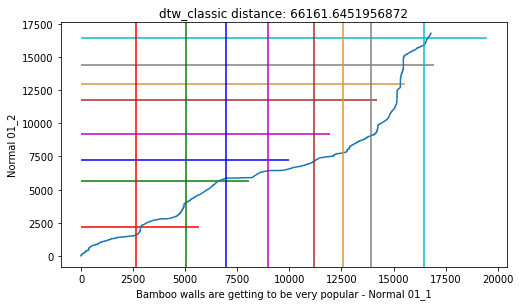

In [42]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.096. Median err (s): 0.066
Stretch speech: 0.185 
Stretch pause: 0.169. 
Stretch unaligned: 0.299. 
Stretch overall: 0.653.


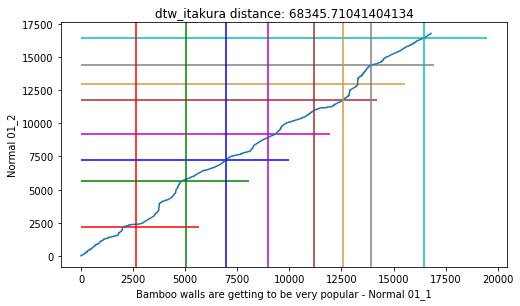

In [43]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.112. Median err (s): 0.101
Stretch speech: 0.194 
Stretch pause: 0.177. 
Stretch unaligned: 0.302. 
Stretch overall: 0.673.


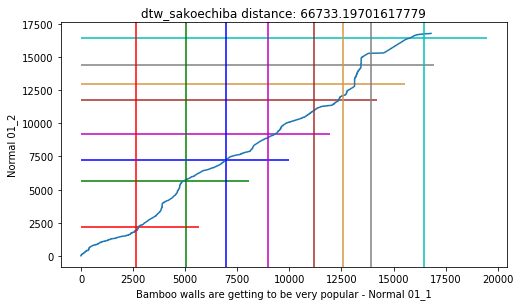

In [44]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.101. Median err (s): 0.071
Stretch speech: 0.190 
Stretch pause: 0.203. 
Stretch unaligned: 0.280. 
Stretch overall: 0.673.


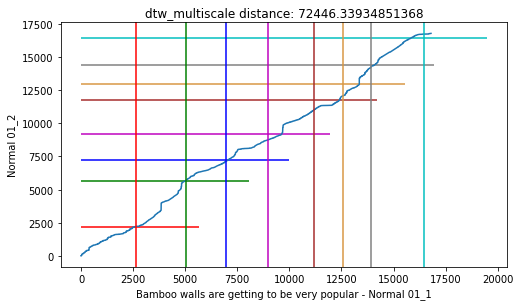

In [45]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

# Bamboo - perfect alignment - Normal v.s. Normal 01_1 vs. 01_3

In [46]:
file1, seg1_1, seg1_2 = "01_1.wav", 2, 4.1
file2, seg2_1, seg2_2 = "01_3.wav", 2, 4

x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)
time1_lst = [2.33, 2.63, 2.87, 3.12, 3.4, 3.57, 3.74, 4.06]
time2_lst = [2.06, 2.45, 2.7, 2.94, 3.23, 3.41, 3.62, 3.98];
xlabel = "Bamboo walls are getting to be very popular - Normal 01_1" ;  ylabel = "Normal 01_3"

Avg err (s): 0.088. Median err (s): 0.072
Stretch speech: 0.246 
Stretch pause: 0.161. 
Stretch unaligned: 0.230. 
Stretch overall: 0.636.


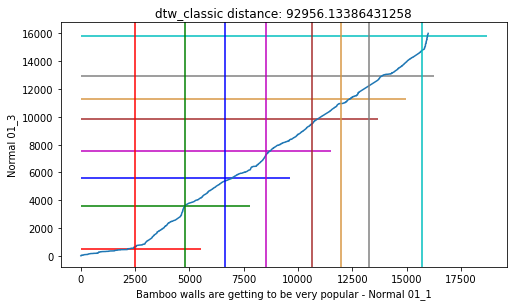

In [47]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.274. Median err (s): 0.317
Stretch speech: 0.271 
Stretch pause: 0.116. 
Stretch unaligned: 0.294. 
Stretch overall: 0.681.


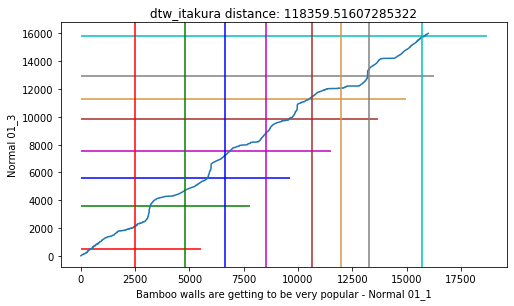

In [48]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.112. Median err (s): 0.083
Stretch speech: 0.241 
Stretch pause: 0.144. 
Stretch unaligned: 0.246. 
Stretch overall: 0.632.


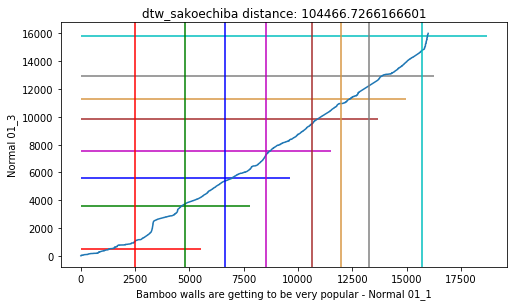

In [49]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.099. Median err (s): 0.083
Stretch speech: 0.254 
Stretch pause: 0.158. 
Stretch unaligned: 0.235. 
Stretch overall: 0.647.


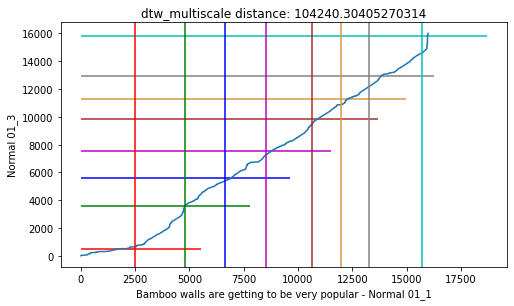

In [50]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

# Bamboo - normal vs. slightly slow: 01 vs 02: Bamboo walls are getting to be very popular

In [30]:
file1, seg1_1, seg1_2 = "01.wav", 3, 6
file2, seg2_1, seg2_2 = "02.wav", 1.7, 5
                                
x, y, samplerate, speech_x, speech_y = make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2, sr)
n_timestamps_1, n_timestamps_2 = len(x), len(y)
time1_lst = [3.46, 3.88, 4.16, 4.42, 4.77, 4.91, 5.21, 5.47]
time2_lst = [1.74, 2.42, 2.92, 3.52, 3.75, 3.88, 4.29, 4.58]
xlabel = "Bamboo walls are getting to be very popular - Normal 01" ;  ylabel = "Normal 02"

In [31]:
setup.play_samples(x, y, samplerate)

Avg err (s): 0.178. Median err (s): 0.154
Stretch speech: 0.119 
Stretch pause: 0.376. 
Stretch unaligned: 0.151. 
Stretch overall: 0.647.


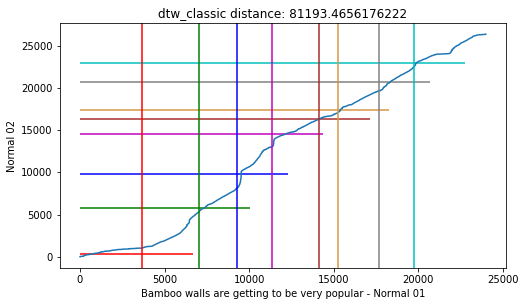

In [35]:
classic(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.264. Median err (s): 0.219
Stretch speech: 0.107 
Stretch pause: 0.273. 
Stretch unaligned: 0.279. 
Stretch overall: 0.660.


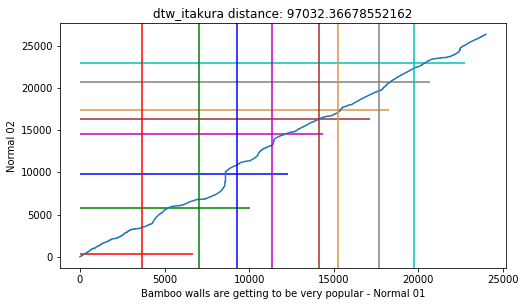

In [32]:
itakura(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

Avg err (s): 0.187. Median err (s): 0.136
Stretch speech: 0.106 
Stretch pause: 0.305. 
Stretch unaligned: 0.240. 
Stretch overall: 0.651.


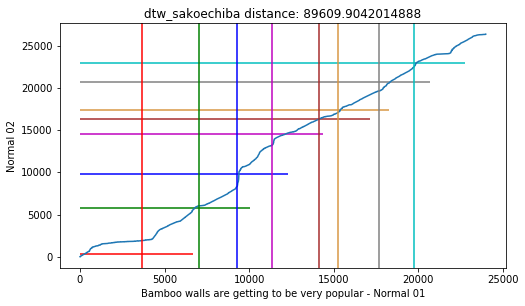

In [33]:
sakoechiba(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

In [37]:
multiscale(x, y, xlabel, ylabel, time1_lst, time2_lst, sr, speech_x, speech_y)

ValueError: cannot reshape array of size 26399 into shape (5)